In [157]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import MACCSkeys
import numpy as np
import pandas as pd
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.MACCSkeys import smartsPatts
from rdkit.Chem.Draw import IPythonConsole
import copy

In [158]:
df = pd.read_csv("new_smiles.csv")
mols = [Chem.MolFromSmiles(smile) for smile in df["SMILES"]]
fps = [MACCSkeys.GenMACCSKeys(mol) for mol in mols]

In [159]:
[sum(np.array(fps[i])) for i in range(0, len(fps))]

[43,
 48,
 35,
 41,
 28,
 32,
 26,
 35,
 47,
 51,
 69,
 60,
 40,
 30,
 55,
 58,
 44,
 33,
 47,
 45,
 44,
 34,
 35,
 31,
 34,
 57,
 35,
 28,
 57,
 41,
 72,
 22,
 62,
 58,
 21,
 27,
 30,
 25,
 69,
 46,
 25,
 58,
 39,
 48,
 43,
 43,
 54,
 54,
 36,
 46,
 33,
 72,
 44,
 26,
 34,
 32,
 38,
 64,
 34,
 47,
 40,
 30,
 73,
 41,
 52,
 56,
 43,
 14,
 29,
 7,
 73,
 65,
 67,
 27,
 43,
 69,
 28,
 35,
 37,
 71,
 56,
 51,
 33,
 43,
 27,
 49,
 67,
 41,
 46,
 30,
 31,
 57,
 53,
 33,
 38,
 55,
 38,
 52,
 26,
 44,
 49,
 72,
 55,
 62,
 34,
 33,
 27,
 13,
 37,
 58,
 41,
 30,
 76,
 35,
 58,
 24,
 53,
 36,
 32,
 46,
 27,
 43,
 7,
 33,
 41,
 33,
 25,
 64,
 39,
 26,
 42,
 42,
 33,
 25,
 43,
 44,
 29,
 49,
 45,
 32,
 35,
 34,
 38,
 61,
 42,
 29,
 33,
 41,
 37,
 66,
 32,
 48,
 38,
 30,
 40,
 51,
 40,
 56,
 37,
 40,
 51,
 16,
 30,
 34,
 34,
 39,
 36,
 30,
 32,
 40,
 27,
 31,
 30,
 51,
 31,
 59,
 33,
 60,
 23,
 28,
 65,
 65,
 34,
 38,
 49,
 47,
 50,
 32,
 53,
 58,
 47,
 37,
 22,
 77,
 33,
 21,
 11,
 50,
 38,
 59,
 2

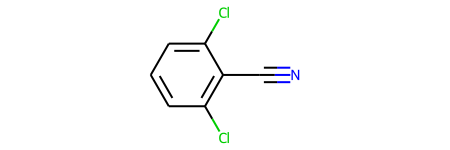

In [160]:
mols[347]

In [161]:
list(fps[347].GetOnBits())

[41, 87, 103, 107, 134, 144, 150, 161, 162, 163, 165]

In [162]:
np.nonzero(np.array(fps[347]))

(array([ 41,  87, 103, 107, 134, 144, 150, 161, 162, 163, 165]),)

- 41: ('[#6]#[#7]', 0),  # CTN
- 87: ('[F,Cl,Br,I]!@*@*', 0),  # X!A$A
- 103: ('Cl', 0),  # CL
- 107: ('[F,Cl,Br,I]~*(~*)~*', 0),  # XA(A)A
- 134: ('[F,Cl,Br,I]', 0),  # X (HALOGEN)
- 144: ('*!:*:*!:*', 0),  # Anot%A%Anot%A
- 150: ('*!@*@*!@*', 0),  # A!A$A!A
- 161: ('[#7]', 0),  # N
- 162: ('a', 0),  # Aromatic 
- 163: ('*1~*~*~*~*~*~1', 0),  # 6M Ring
- 165: ('[R]', 0),  # Ring

In [163]:
id_mol = 347
onbits = list(fps[id_mol].GetOnBits())
m = copy.deepcopy(mols[id_mol])
mMols = [m] * len(onbits)
highlight_list = []
for onbit in onbits:
    smart = smartsPatts[onbit][0]
    sub = Chem.MolFromSmarts(smart)
    highlight = m.GetSubstructMatches(sub)
    hit_ats = []
    for tp in highlight:
        for i in tp:
            hit_ats.append(i)
    highlight_list.append(list(hit_ats))
    
img = Draw.MolsToGridImage(mMols, highlightAtomLists=highlight_list, subImgSize=(250, 250), useSVG=False)
img.save('MACCS_Visualization.png')

AttributeError: 'Image' object has no attribute 'save'

In [ ]:
highlight_list

[[1, 0],
 [4, 3, 2, 4, 3, 5, 9, 8, 7, 9, 8, 2],
 [4, 9],
 [4, 3, 2, 5, 9, 8, 7, 2],
 [4, 9],
 [1, 2, 3, 4, 1, 2, 8, 9],
 [1, 2, 3, 4, 1, 2, 8, 9],
 [0],
 [2, 3, 5, 6, 7, 8],
 [2, 3, 5, 6, 7, 8],
 [2, 3, 5, 6, 7, 8]]

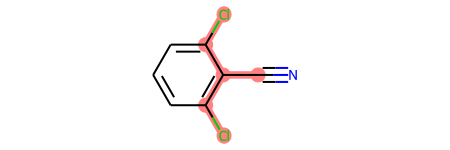

In [ ]:
# 41,  87, 103, 107, 134, 144, 150, 161, 162, 163, 165
smart = smartsPatts[150][0]
m1 = copy.deepcopy(mols[347])
sub = Chem.MolFromSmarts(smart)
m1.GetSubstructMatches(sub)
m1
# d = rdMolDraw2D.MolDraw2DCairo(250, 250)
# rdMolDraw2D.PrepareAndDrawMolecule(d,m1, highlightAtoms=hit_ats)
# d.WriteDrawingText("./atom_labels_3.png")